In [1]:
import torch
from torchvision import datasets, transforms
import os
import shutil
import glob
import numpy as np

In [2]:
# Get current working directory
import sys
current_path = os.getcwd()
sys.path.append(os.path.join(current_path, '../..'))

In [3]:
from roug_ml.configs.my_paths import RESULTS_PATH
from roug_ml.utl.paths_utl import create_dir
from roug_ml.utl.dowload_utils import download_kaggle_dataset
from roug_ml.utl.file_operations import move_files_to_labels_dir, extract_zip
from roug_ml.utl.data_vizualization.images_vizualization import imshow
from roug_ml.utl.dataset_split import split_image_data_from_path

res_path = os.path.join(RESULTS_PATH, 'image_example')
create_dir(res_path)

'/Users/hector/DiaHecDev/results/image_example/'

In [4]:
res_path

'/Users/hector/DiaHecDev/results/image_example'

In [5]:
if False:
    download_kaggle_dataset(dataset='dogs-vs-cats', 
                            username="kensou",
                            key="7aefffc32036aa470ac86d76a4a80576",
                            download_path=res_path)
    extract_zip(os.path.join(res_path, 'dogs-vs-cats.zip'), res_path)
    extract_zip(os.path.join(res_path, 'test1.zip'), res_path)
    extract_zip(os.path.join(res_path, 'train.zip'), res_path)
    
    move_files_to_labels_dir(os.path.join(res_path, 'train'), ['cat', 'dog'])

In [6]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize images to 224x224
    transforms.ToTensor(),  # convert image to PyTorch Tensor data type
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize images
])

In [12]:
train_path = os.path.join(res_path, 'train')

# Load datasets
#all_data = datasets.ImageFolder(train_path, transform=transform)
train_data, val_data, test_data = split_image_data_from_path(main_path=train_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, 
                                                             transform=transform)

#val_data = datasets.ImageFolder(train_path, transform=transform)



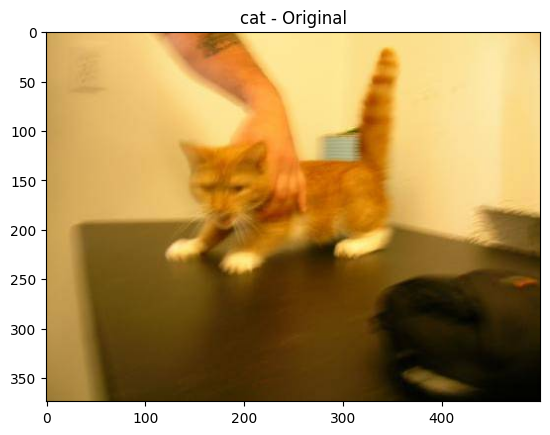

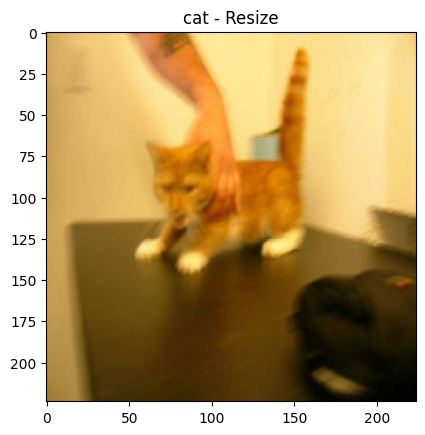

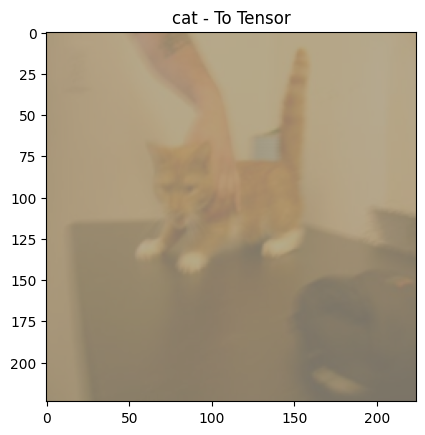

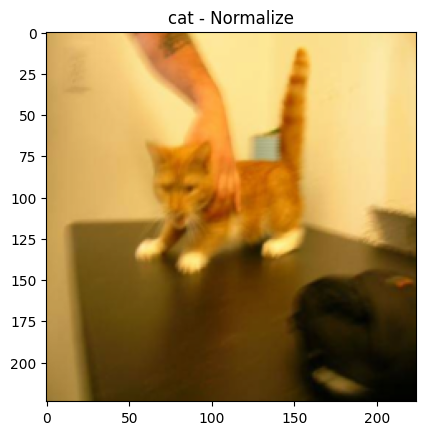

In [8]:
# Define transformations
resize_transform = transforms.Resize((224, 224))  # resize images to 224x224
to_tensor_transform = transforms.ToTensor()  # convert image to PyTorch Tensor data type
normalize_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize images

# Load datasets
train_data = datasets.ImageFolder(train_path)

# Get label names
label_names = train_data.classes

# Select an image
img, label = train_data[0]

# Show original image
imshow(img, f'{label_names[label]} - Original')

# Apply resize
img = resize_transform(img)
imshow(img, f'{label_names[label]} - Resize')

# Convert to tensor
img = to_tensor_transform(img)
imshow(img, f'{label_names[label]} - To Tensor')

# Normalize
img = normalize_transform(img)
imshow(img, f'{label_names[label]} - Normalize')

In [68]:
from torch.utils.data import random_split

# Assuming 'dataset' is your dataset of interest
n_samples = len(train_data)
print(n_samples)
n_train_samples = 5000  # Number of training samples you want

# Ensure the number of desired training samples does not exceed the total number of samples
assert n_train_samples <= n_samples

train_data, _ = random_split(train_data, [n_train_samples, n_samples - n_train_samples])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

37500


In [13]:
# Create dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

In [14]:
from roug_ml.models.nn_models import CNN2DTorch

In [15]:
# Assume the input image shape is (3, 128, 128) and output classes are 2
# Replace with actual values
input_shape = (3, 224, 224)
output_shape = 2

# Initialize the model
model = CNN2DTorch(input_shape, output_shape)
#model.apply(model.weights_init)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} / {epochs}, Loss: {loss.item()}")

Epoch 1 / 5, Loss: 0.6327003240585327
Epoch 2 / 5, Loss: 0.65570068359375
Epoch 3 / 5, Loss: 0.5830131769180298
Epoch 4 / 5, Loss: 0.6043291091918945
Epoch 5 / 5, Loss: 0.527251124382019


In [16]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Validation Accuracy: {} %'.format((correct / total) * 100))


Validation Accuracy: 62.96000000000001 %


In [ ]:
nn_key = ['CNN2D']
input_shape = [np.asarray(x_train).shape[1]]
output_shape = [2]
batch_size = [64]
cost_function = [torch.nn.CrossEntropyLoss()]
learning_rate = [0.001]
n_epochs = [10]
metrics = ['accuracy']
cnn_filters = [1, 3, 5, 10]

list_params = generate_param_grid_with_different_size_layers(nn_key, input_shape,
                                                             output_shape, batch_size,
                                                             cost_function, learning_rate,
                                                             n_epochs, metrics,
                                                             layer_sizes, activations,
                                                             cnn_filters)

In [ ]:
params["cost_function"] = 
pipeline_torch = Pipeline(steps=[('NN', NNTorch(**params))])
params_pipeline = {
    pipeline_torch.steps[-1][0] + "__validation_data": (x_val.reshape(x_val.shape[0],
                                                                      x_val.shape[1]),
                                                        y_val)}
pipeline_torch.fit(x_train.reshape(x_train.shape[0], x_train.shape[1]), y, **params_pipeline)